In [145]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [146]:
#Importing ModelsDao functions
%run "../../ModelsDao/ModelsGeneration.py"

In [147]:
news_dataset = pd.read_csv("../Datasets/train.csv")

In [148]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# 1.) Exploratory Data Analysis

In [149]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [150]:
news_dataset.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [151]:
news_dataset.shape

(20800, 5)

In [152]:
feature_data = news_dataset.drop('label',axis=1)
target = news_dataset['label']

<AxesSubplot:>

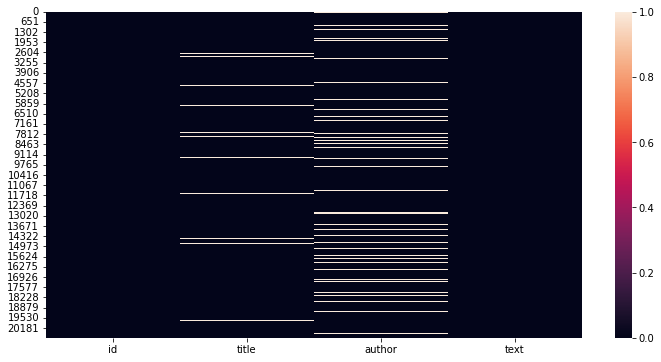

In [153]:
plt.figure(figsize=(12,6))
sns.heatmap(feature_data.isnull())

In [154]:
feature_data.isnull().sum()

id           0
title      558
author    1957
text        39
dtype: int64

### Conclusion
#### 1.) There are missing values for title, author and text features.
#### 2.) We have text data for tile, author and text features. So we have to convert it to numeric data.


### 1.a) Cleaning the Data

In [155]:
news_dataset = news_dataset.fillna(" ")

In [156]:
news_dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [157]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [158]:
news_dataset_cleaned = news_dataset.drop(['id','text'],axis=1)

In [159]:
news_dataset_cleaned.head()

,title,author,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1


In [160]:
# We will form a new features from title and author feature. Say Title-Author.
news_dataset_cleaned['Author-Title'] = news_dataset_cleaned['author'] + " " + news_dataset_cleaned['title'] 

In [161]:
news_dataset_cleaned.head()

,title,author,label,Author-Title
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,1,Consortiumnews.com Why the Truth Might Get You...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,1,Howard Portnoy Iranian woman jailed for fictio...


In [162]:
news_dataset_cleaned.drop(['author','title'],axis=1,inplace=True)

In [163]:
news_dataset_cleaned.head()

,label,Author-Title
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...


In [164]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Priyesh
[nltk_data]     Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [165]:
stop_words = stopwords.words('english')

In [166]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [167]:
stem_porter = PorterStemmer()

In [168]:
def stem_data(text):
  #Here we are filtering the special characters from the text.
  cleaned_text = re.sub("[^a-zA-Z]", " ",text)
  cleaned_text = cleaned_text.lower()
  words_list = cleaned_text.split()
  #Here we are making a new list of stemmed words. These stemmed words are the stemmed version of words which are in words_list but not in stop_words.
  stemmed_words = [stem_porter.stem(word) for word in words_list if word not in stop_words]
  return " ".join(stemmed_words)

In [169]:
news_dataset_cleaned['Author-Title-Stemmed'] = news_dataset_cleaned['Author-Title'].apply(stem_data)

In [170]:
news_dataset_cleaned.head()

,label,Author-Title,Author-Title-Stemmed
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrel lucu hous dem aid even see comey letter...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",daniel j flynn flynn hillari clinton big woman...
2,1,Consortiumnews.com Why the Truth Might Get You...,consortiumnew com truth might get fire
3,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss civilian kill singl us airstri...
4,1,Howard Portnoy Iranian woman jailed for fictio...,howard portnoy iranian woman jail fiction unpu...


In [171]:
print(news_dataset_cleaned['Author-Title-Stemmed'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: Author-Title-Stemmed, Length: 20800, dtype: object


In [172]:
X = news_dataset_cleaned['Author-Title-Stemmed'].values
y = news_dataset_cleaned['label'].values

In [173]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X)

In [174]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 2483)	0.3676519686797209
  (0, 7692)	0.24785219520671603
  (0, 8630)	0.29212514087043684
  (0, 2959)	0.2468450128533713
  (0, 13473)	0.2565896679337957
  (0, 4973)	0.233316966909351
  (0, 267)	0.27010124977708766
  (0, 3792)	0.2705332480845492
  (0, 7005)	0.21874169089359144
  (0, 8909)	0.3635963806326075
  (0, 3600)	0.3598939188262559
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 16799)	0.30071745655510157
  (1, 1497)	0.2939891562094648
  (1, 2813)	0.19094574062359204
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  (2, 15611)	0.41544962664721613
  (2, 2943)	0.3179886800654691
  :	:
  (20797, 1287)	0.3353805680413986
  (20797, 13122)	0.24825263521976057
  (20797, 12344)	0.27263457663336677
  (20797, 14967)	0.3115945315488075
  (20797, 12138)	0.24778257724396505
  (20797, 9518)	0.295420

In [175]:
X.shape

(20800, 17128)

In [176]:
y.shape

(20800,)

# 2.) Creating Model

### 2.a) Logistic Model on Training Data

In [177]:
models_info = []

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [179]:
logistic_model = buildLogisticRegressionModel(X_train,y_train)

In [180]:
predictions_train = logistic_model.predict(X_train)
models_info.append((logistic_model,"Logistic Model on Training Data",y_train,predictions_train))

In [181]:
predictions_test = logistic_model.predict(X_test)
models_info.append((logistic_model,"Logistic Model on Test Data",y_test,predictions_test))

### 2.b) Logistic Model on Test Data

In [182]:
#news_dataset_test = pd.read_csv("../Datasets/test.csv")
#news_dataset_submit = pd.read_csv("../Datasets/submit.csv")

In [183]:
#news_dataset_test.isnull().sum()

In [184]:
#news_dataset_test.shape

In [185]:
#X_eval = clean_data_Fake_News_Predictor(news_dataset_test)

In [186]:
#X_eval.shape

In [187]:
#news_dataset_submit.head()

In [188]:
#y_eval = news_dataset_submit['label']

In [189]:
#y_eval.shape

In [190]:
#prediction_eval = logistic_model.predict(X_eval)

In [191]:
#X_eval.shape

In [192]:
#prediction_eval = logistic_model.predict(X_eval)
#models_info.append((logistic_model,"Logistic Model on Test Data",y_eval,prediction_eval))

### 2.c) See Models Performance

In [193]:
for model in models_info:
  see_Log_Model_Performance(model[0],model[1],model[2],model[3])

For Logistic Model on Training Data
Accuracy Score:  0.9857204362801377
Confusion Metrix:  [[6822  157]
 [  42 6915]]

For Logistic Model on Test Data
Accuracy Score:  0.9708624708624709
Confusion Metrix:  [[3238  170]
 [  30 3426]]

